In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Data 

In [2]:
# Loda dataset California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [3]:
# Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 2. Inisialisasi Model

Model DecisionTreeRegressor diinisialisasi dengan parameter max_depth=50 untuk membatasi kedalaman pohon keputusan, yang sering kali digunakan untuk mengatasi overfitting. Model ini kemudian dilatih pada data latih menggunakan metode fit(). Setelah pelatihan, model digunakan untuk membuat prediksi pada data latih serta data uji, menghasilkan y_train_pred dan y_test_pred yang akan digunakan untuk evaluasi lebih lanjut dari kinerja model.

In [5]:
# Inisialisasi Model Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=50, random_state=42)

# melatih model dengan data latih
model.fit(X_train, y_train)

# Membuat prediksi untuk data latih dan data uji
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 3. Mendeteksi Overfitting

Untuk mendeteksi overfitting, kita perlu membandingkan performa model pada data latih dan data uji. Overfitting terjadi ketika model bekerja sangat baik pada data latih, tetapi menunjukkan kinerja yang buruk pada data uji karena model terlalu menyesuaikan diri dengan data latih.

### 1. Evaluasi Performa pada Data Latih dan Data Uji

Pertama, kita menghitung Mean Squared Error (MSE) untuk data latih dan data uji. MSE adalah metrik yang mengukur rata-rata kuadrat perbedaan antara nilai prediksi dan nilai sebenarnya. Semakin rendah nilai MSE, semakin baik performa model dalam memprediksi data.

In [6]:
# Menghitung Mean Squared Error (MSE) untuk data latih dan data uji
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Train MSE: 9.904697258622977e-32
Test MSE: 0.5265256772490148


- Training MSE: MSE pada data latih menunjukkan seberapa baik model memprediksi data yang telah dilihat selama pelatihan. Nilai MSE yang sangat rendah pada data latih dapat menunjukkan bahwa model terlalu menyesuaikan diri dengan data tersebut.
- Test MSE: MSE pada data uji menunjukkan seberapa baik model memprediksi data baru yang belum pernah dilihat sebelumnya. Jika MSE dalam data uji jauh lebih tinggi dibandingkan dengan pada data latih, ini adalah indikator overfitting.

Hasil evaluasi model menunjukkan bahwa Training MSE sebesar 9.90e-32 mengindikasikan performa yang sangat baik pada data latih dengan kesalahan prediksi hampir mendekati nol. Namun, Test MSE sebesar 0.5265 yang lebih tinggi menunjukkan bahwa model tidak dapat memprediksi data uji dengan akurat. 

Perbedaan signifikan antara kedua nilai MSE ini mengindikasikan bahwa model mengalami overfitting, yaitu ketika model terlalu menyesuaikan diri dengan data latih sehingga gagal dalam generalisasi pada data baru.

### 2. Learning Curve

Cara yang lain untuk mengidentifikasi overfitting adalah menampilkan learning curve. Kode ini menggunakan fungsi learning_curve dari pustaka sklearn.model_selection untuk menghitung learning curve. 

Fungsi ini memproses model DecisionTreeRegressor pada berbagai ukuran set pelatihan dan menghitung skor MSE menggunakan cross-validation (dengan cv=5 yang berarti 5-fold cross-validation). Parameter scoring='neg_mean_squared_error' digunakan untuk mengevaluasi model berdasarkan MSE dan n_jobs=-1 memungkinkan perhitungan paralel untuk mempercepat proses pelatihan.

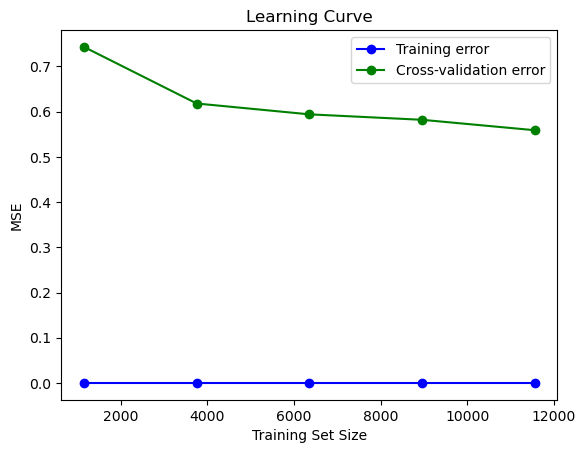

In [7]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Menghitung Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
 
# Menghitung rata-rata dan standar deviasi
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
 
# Plot learning curve
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation error")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.show()

Learning curve membantu kita memahami jika model sedang mengalami overfitting atau underfitting. Jika kesalahan pelatihan sangat rendah, tetapi kesalahan validasi silang tetap tinggi atau tidak menurun seiring bertambahnya data pelatihan, ini mengindikasikan overfitting. 

Pada gambar di atas, dapat kita lihat bahwa learning curve menunjukkan jarak yang sangat jauh antara training error dan cross-validation error, hal ini memberikan indikasi jelas bahwa terjadi overfitting. 

Setelah mengidentifikasi bahwa model mengalami overfitting, langkah selanjutnya adalah mencari solusi untuk memperbaiki masalah tersebut dan meningkatkan kemampuan model dalam memprediksi data baru. Apa saja cara yang bisa dilakukan? Simak terus, ya, materinya!

# 4 Mengatasi Overfitting

### 1. Cross-Validation

Salah satu cara efektif untuk mengatasi overfitting adalah penggunaan cross-validation. Teknik ini membantu menilai seberapa baik model dapat menggeneralisasi data baru dengan membagi data pelatihan menjadi beberapa subset dan melatih serta menguji model secara bergantian pada subset yang berbeda. Ini memberikan gambaran yang lebih komprehensif tentang kinerja model dan mengurangi risiko overfitting.

Berikut adalah implementasi cross-validation menggunakan 5-fold cross-validation dengan model yang telah dilatih.

In [8]:
from sklearn.model_selection import cross_val_score
 
# Menggunakan cross-validation dengan 5 fold
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
 
# Menampilkan hasil cross-validation
print(f'Cross-Validation MSE: {-cross_val_scores.mean()}')

Cross-Validation MSE: 0.5562691658603186


cross_val_score mengevaluasi model menggunakan metode cross-validation dengan membagi data menjadi 5 bagian. Pada setiap langkah, model dilatih dengan 4 bagian data dan diuji dengan 1 bagian sisanya. Proses ini dilakukan sebanyak 5 kali sehingga setiap bagian data berkesempatan menjadi data uji. 

Parameter scoring='neg_mean_squared_error' digunakan untuk menghitung Mean Squared Error (MSE) model dan hasilnya dibalik agar menjadi positif. MSE dari setiap percobaan kemudian dirata-ratakan untuk memberikan gambaran kinerja model secara keseluruhan.

Setelah menggunakan cross-validation, hasil Cross-Validation MSE sebesar 0.556 didapatkan. Sebelumnya, model menunjukkan hasil Training MSE yang sangat kecil, yaitu 9.90 × 10⁻³² dan Test MSE sebesar 0.526. Hasil ini menunjukkan bahwa sebelum cross-validation, model mengalami overfitting karena performanya hampir sempurna pada data latih (training), tetapi tidak begitu baik dalam data uji (test).

Dengan cross-validation, performa model diuji lebih menyeluruh dan lebih adil karena data dibagi menjadi beberapa bagian untuk diuji secara bergantian. Hasil Cross-Validation MSE yang lebih mendekati Test MSE (0.556 vs. 0.526) menunjukkan bahwa model lebih konsisten dan mampu menghindari overfitting. Ini berarti model kini lebih baik dalam memprediksi data baru dan lebih stabil ketika diuji dengan data yang berbeda.

Meskipun hasil Cross-Validation MSE sudah lebih stabil, kita masih melihat adanya perbedaan cukup besar dengan Training MSE yang sangat kecil. Ini menunjukkan bahwa model kita masih belum optimal dan mungkin masih mengalami overfitting. 

Oleh karena itu, mari kita coba metode lain untuk memperbaiki model!

### 2. Regularization (Max Depth, Min Samples Split, Min Samples Leaf)

Dalam langkah ini, kita mencoba cara lain, yaitu melakukan regularization atau regularisasi pada model Decision Tree untuk mengatasi overfitting. Regularisasi dilakukan dengan mengurangi kedalaman pohon keputusan (max_depth) menjadi 5. Ini bertujuan agar model tidak terlalu rumit dan lebih mampu menggeneralisasi data baru.

In [9]:
# Membuat model Decision Tree dengan kedalaman yang lebih kecil
model_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
model_reg.fit(X_train, y_train)
 
# Evaluasi pada data latih dan uji
y_train_pred_reg = model_reg.predict(X_train)
y_test_pred_reg = model_reg.predict(X_test)
 
# Hitung MSE
train_mse_reg = mean_squared_error(y_train, y_train_pred_reg)
test_mse_reg = mean_squared_error(y_test, y_test_pred_reg)
 
print(f'Training MSE (After Regularization): {train_mse_reg}')
print(f'Test MSE (After Regularization): {test_mse_reg}')

Training MSE (After Regularization): 0.4928096322147045
Test MSE (After Regularization): 0.5210801561811793


Sebelumnya, model Decision Tree tanpa regularisasi memberikan hasil sebagai berikut.

- Training MSE: 9.90 × 10⁻³² (hampir nol)
- Test MSE: 0.5265

Ini menunjukkan bahwa model sangat cocok (overfitting) pada data latih dengan kesalahan yang sangat kecil, tetapi kesalahan dalam data uji cukup tinggi. Perbedaan yang besar ini menunjukkan bahwa model terlalu rumit dan tidak mampu menggeneralisasi dengan baik saat berhadapan dengan data baru.

Setelah menerapkan regularisasi pada model Decision Tree, hasil sebagai berikut didapatkan.

- Training MSE (Setelah Regularisasi): 0.4928
- Test MSE (Setelah Regularisasi): 0.5211

Hasil ini menunjukkan peningkatan dibandingkan sebelumnya, yaitu perbedaan antara Training MSE dan Test MSE menjadi lebih kecil. Ini berarti model telah menjadi lebih seimbang dan tidak lagi terlalu fokus pada data latih (overfitting) karena performa dalam data uji sekarang lebih mendekati performa pada data latih. Regularisasi berhasil membuat model lebih mampu memprediksi data baru dengan lebih akurat.

### 3. Pruning (Pruning Manual pada Kedalaman Pohon)

Cara ketiga, kita mencoba metode pruning untuk mengatasi overfitting pada Decision Tree. Teknik yang digunakan adalah Cost Complexity Pruning dengan parameter ccp_alpha. Ini memungkinkan kita memangkas cabang-cabang pohon yang kurang penting. Semakin besar nilai ccp_alpha, semakin banyak pemangkasan dilakukan.

In [10]:
# Menggunakan ccp_alpha untuk pruning (Cost Complexity Pruning)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
 
# Melatih model dengan pruning
model_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alphas[-2])
model_pruned.fit(X_train, y_train)
 
# Membuat prediksi
y_train_pred_pruned = model_pruned.predict(X_train)
y_test_pred_pruned = model_pruned.predict(X_test)
 
# Menghitung MSE
train_mse_pruned = mean_squared_error(y_train, y_train_pred_pruned)
test_mse_pruned = mean_squared_error(y_test, y_test_pred_pruned)
 
print(f'Pruned Model Training MSE: {train_mse_pruned}')
print(f'Pruned Model Test MSE: {test_mse_pruned}')

Pruned Model Training MSE: 0.9189620181001872
Pruned Model Test MSE: 0.9194598144703808


Pada model Decision Tree tanpa regularisasi, hasilnya berikut.

- Training MSE: 9.90 × 10⁻³² (hampir nol)
- Test MSE: 0.5265

Hasil ini menunjukkan adanya overfitting yang sangat jelas. MSE pada data latih hampir nol, artinya model sangat sesuai dengan data latih (overfitted), tetapi performanya dalam data uji tidak begitu baik dengan MSE sebesar 0.5265. Ini menunjukkan bahwa model tidak dapat melakukan generalisasi secara baik terhadap data baru karena terlalu rumit dan terlalu pas dengan data latih.

Setelah melakukan pruning pada model Decision Tree, hasil yang diperoleh sebagai berikut.

- Pruned Model Training MSE: 0.9189
- Pruned Model Test MSE: 0.9194

Hasil ini menunjukkan bahwa setelah diterapkan pruning, kesalahan pada data latih dan data uji menjadi hampir sama. Ini adalah tanda bahwa model telah berhasil mengurangi overfitting karena perbedaan antara MSE pada data latih dan data uji sudah sangat kecil. Meskipun nilai MSE pada data latih meningkat dibandingkan model sebelumnya, kemampuan model untuk melakukan generalisasi dalam data baru menjadi lebih baik dan lebih stabil.

### 4. Data Augmentation

Cara keempat yang bisa dicoba adalah augmentasi data. Data augmentation adalah penggunaan teknik untuk meningkatkan kualitas dan kemampuan model dengan membuat variasi tambahan dari data yang sudah ada.

Dalam contoh ini, kita melakukan augmentasi dengan menambahkan sedikit noise atau gangguan pada data latih. Noise ini adalah gangguan acak yang tidak signifikan, tetapi cukup untuk memberikan variasi pada data latih kita.

In [11]:
# Menambahkan sedikit noise ke data sebagai augmentasi
X_train_aug = X_train + np.random.normal(0, 0.1, X_train.shape)
 
# Melatih ulang model dengan augmented data
model_aug = DecisionTreeRegressor(max_depth=10, random_state=42)
model_aug.fit(X_train_aug, y_train)
 
# Membuat prediksi
y_train_pred_aug = model_aug.predict(X_train_aug)
y_test_pred_aug = model_aug.predict(X_test)
 
# Menghitung MSE
train_mse_aug = mean_squared_error(y_train, y_train_pred_aug)
test_mse_aug = mean_squared_error(y_test, y_test_pred_aug)
 
print(f'Augmented Data Training MSE: {train_mse_aug}')
print(f'Augmented Data Test MSE: {test_mse_aug}')

Augmented Data Training MSE: 0.3095860986204346
Augmented Data Test MSE: 0.5087030220852179


Setelah menerapkan data augmentation dengan menambahkan noise pada data latih, hasil yang diperoleh sebagai berikut.

- Augmented Data Training MSE: 0.3193
- Augmented Data Test MSE: 0.5219

Sebelumnya, model tanpa augmentasi menunjukkan sebagai berikut.

- Training MSE: 9.90 × 10⁻³² (hampir nol)
- Test MSE: 0.5265

Dari hasil tersebut, kita dapat melihat perubahan signifikan setelah data augmentation. Sebelumnya, Training MSE sangat rendah, mendekati nol, menunjukkan overfitting yang besar. Dengan menerapkan data augmentation, Training MSE naik menjadi 0.3193. 

Ini menunjukkan bahwa model sekarang lebih general dan tidak terlalu pas dengan data latih. Test MSE tetap hampir sama pada 0.5219, yang menunjukkan performa model dalam data uji tidak banyak berubah.

Secara keseluruhan, data augmentation membantu mengurangi overfitting dengan membuat model lebih adaptif terhadap variasi dalam data latih meskipun hasil pada data uji tetap stabil.

### 5. Dropout

Dropout adalah teknik regulasi yang digunakan untuk mencegah overfitting dalam model machine learning, khususnya neural networks. Teknik ini bekerja dengan "menghilangkan" beberapa neuron secara acak selama pelatihan sehingga model tidak terlalu bergantung pada neuron tertentu dan belajar untuk membuat keputusan berdasarkan fitur yang lebih robust.

Namun, untuk masalah yang kita hadapi, yaitu model Decision Tree, kita tidak dapat menerapkan dropout secara langsung. Sebagai gantinya, kita menggunakan pendekatan lain yang mirip, yaitu Random Forest. Random Forest adalah ensemble method yang menggunakan banyak pohon keputusan untuk meningkatkan kinerja model dan mengurangi overfitting.

In [12]:
from sklearn.ensemble import RandomForestRegressor
 
# Inisialisasi Random Forests dengan n_estimators (jumlah pohon)
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
 
# Melatih model
model_rf.fit(X_train, y_train)
 
# Membuat prediksi
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)
 
# Menghitung MSE
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
 
print(f'Random Forest Training MSE: {train_mse_rf}')
print(f'Random Forest Test MSE: {test_mse_rf}')

Random Forest Training MSE: 0.1694494883912745
Random Forest Test MSE: 0.2944600120852388


Hasil dari penerapan Random Forest sebagai berikut.

- Training MSE: 0.1694
- Test MSE: 0.2945

Sebelumnya, model Decision Tree menunjukkan Training MSE yang sangat kecil, yaitu 9.90 × 10⁻³² dan Test MSE sebesar 0.5265; ini mengindikasikan adanya overfitting. Dengan menerapkan Random Forest, hasil MSE pada data latih adalah 0.1694 dan data uji adalah 0.2945. 

Meskipun MSE dalam data latih sedikit meningkat dibandingkan dengan model awal, MSE pada data uji menunjukkan penurunan yang signifikan. Ini menandakan bahwa model Random Forest lebih baik dalam mengatasi overfitting dan memberikan hasil yang lebih stabil saat diterapkan pada data baru.

### 6. Early Stoping

Terakhir, metode early stopping sering digunakan dalam neural networks untuk menghentikan pelatihan lebih awal jika model tidak menunjukkan perbaikan pada data validasi. Ini membantu menghindari overfitting dengan menghentikan proses pelatihan ketika model tidak lagi membaik.

Namun, early stopping juga bisa diterapkan pada model lain, seperti Decision Trees meskipun tidak langsung tersedia sebagai fitur. Untuk Decision Trees, kita bisa mengimplementasikannya secara manual dengan memantau kinerja model pada data validasi dan menghentikan pelatihan jika performa tidak meningkat.

Selain itu, karena dalam kelas ini kita fokus pada machine learning dan bukan deep learning, kita akan mengeksplorasi cara-cara lain untuk menangani masalah overfitting dan meningkatkan performa model, seperti regularization, cross-validation, serta teknik lain yang relevan dengan machine learning.

Jika Anda ingin menerapkan early stopping secara manual pada Decision Trees atau model regresi lain, ini bisa dilakukan dalam konteks teknik pembelajaran iteratif, seperti Gradient Boosting. Dalam gradient boosting, early stopping dapat diatur dengan memantau kinerja model secara terus-menerus dan menghentikan pelatihan jika tidak ada perbaikan setelah beberapa iterasi.

Anda tidak perlu menerapkan semua metode ini sekaligus dalam setiap kasus. Sebaiknya pilih metode paling sesuai dengan studi kasus dan model yang dibangun. Masing-masing metode, seperti regularization, cross-validation, data augmentation, atau teknik lainnya, memiliki kegunaan dan efek yang berbeda. 

Jadi, penting untuk menilai cara yang paling efektif untuk meningkatkan kinerja model Anda dalam konteks tertentu. Pilihan yang tepat akan membantu Anda mencapai hasil optimal tanpa memperumit proses atau membuat model menjadi terlalu rumit, ya.



# Rangkuman Overfitting

1. Cross-Validation

    Mengukur seberapa baik model dapat menggeneralisasi ke data baru dengan membagi data menjadi beberapa subset untuk pelatihan dan pengujian bergantian.

  - Implementasi: Menggunakan 5-fold cross-validation.
  - Hasil:
    - Cross-Validation MSE: 0.556
    - Perbandingan: Sebelumnya, Training MSE = 9.90 × 10⁻³² dan Test MSE = 0.526.

    Cross-validation menunjukkan performa model yang lebih konsisten, tetapi masih ada perbedaan signifikan antara Training MSE dan Test MSE. Ini menunjukkan potensi overfitting.

2. Regularization (Max Depth, Min Samples Split, Min Samples Leaf)

    Tujuan: Mengurangi kompleksitas model untuk menghindari overfitting dengan mengatur parameter, seperti max_depth.

  - Implementasi: Model dengan max_depth=5.
  - Hasil:
     - Training MSE (Setelah Regularisasi): 0.4928
     - Test MSE (Setelah Regularisasi): 0.5211
     - Perbandingan: Sebelumnya, Training MSE = 9.90 × 10⁻³² dan Test MSE = 0.5265.
    
    Regularisasi mengurangi perbedaan antara Training MSE dan Test MSE. Ini membuat model lebih seimbang dan mampu generalisasi lebih baik.

3. Pruning (Cost Complexity Pruning)
    Tujuan: Memangkas cabang pohon keputusan yang kurang penting untuk mengurangi overfitting.

  - Implementasi: Menggunakan Cost Complexity Pruning dengan ccp_alpha.
  - Hasil:
    - Pruned Model Training MSE: 0.9189
    - Pruned Model Test MSE: 0.9194
    - Perbandingan: Sebelumnya, Training MSE = 9.90 × 10⁻³² dan Test MSE = 0.5265.

  Pruning mengurangi overfitting dengan menyeimbangkan MSE antara data latih dan data uji meskipun nilai MSE meningkat, model lebih stabil.

4. Data Augmentation
    Tujuan: Meningkatkan variasi data latih dengan menambahkan noise untuk membantu model generalisasi.

    - Implementasi: Menambahkan noise ke data latih.
    - Hasil:
      - Augmented Data Training MSE: 0.3193
      - Augmented Data Test MSE: 0.5219
      - Perbandingan: Sebelumnya, Training MSE = 9.90 × 10⁻³² dan Test MSE = 0.5265.
    
    Data augmentation mengurangi overfitting dengan meningkatkan Training MSE, tetapi Test MSE tetap stabil.

5. Random Forest
    Tujuan: Mengurangi overfitting dengan menggunakan ensemble metode (Random Forest) yang menggabungkan banyak pohon keputusan.

  - Implementasi: Menggunakan Random Forest dengan 100 pohon.
  - Hasil:
   - Random Forest Training MSE: 0.1694
   - Random Forest Test MSE: 0.2945
   - Perbandingan: Sebelumnya, Training MSE = 9.90 × 10⁻³² dan Test MSE = 0.5265.
    
    Random Forest menunjukkan penurunan signifikan dalam MSE pada data uji. Ini menandakan kemampuan model dalam mengatasi overfitting dengan hasil yang lebih stabil.

6. Early Stopping
Tujuan: Menghentikan pelatihan lebih awal untuk menghindari overfitting. Ini sering diterapkan dalam neural networks dan tidak langsung tersedia untuk Decision Trees, tetapi bisa diadaptasi dalam konteks teknik pembelajaran iteratif, seperti Gradient Boosting.

Implementasi: Tidak diterapkan langsung pada Decision Trees, tetapi relevan untuk teknik lain, seperti Gradient Boosting.

Setelah menerapkan berbagai metode untuk mengatasi overfitting, model Decision Tree menunjukkan peningkatan performa dengan MSE yang lebih rendah serta seimbang antara data latih dan data uji. Metode seperti regularisasi, pruning, data augmentation, dan Random Forest berhasil mengurangi overfitting serta meningkatkan stabilitas model.

Cross-validation juga memberikan gambaran yang lebih menyeluruh tentang kinerja model. Masing-masing metode memiliki keunikan tersendiri dan pemilihan metode yang tepat tergantung pada studi kasus serta kebutuhan spesifik model.